<center><h1>EDA on Udemy Courses Dataset</h1></center>

### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### Importing and preprocessing the dataset 

In [3]:
data = pd.read_csv("udemy_courses.csv")

In [4]:
original_data = pd.read_csv("udemy_courses.csv")

In [5]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [6]:
data.shape

(3678, 12)

In [7]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [8]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [10]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

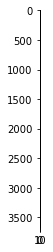

In [11]:
plt.imshow(data.isnull(), cmap='hot', interpolation='nearest')
plt.show()

The empty graph implies the absence of Null or missing values

### Data Analysis 

<b>Subjects available</b>

In [12]:
data['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

'Business Finance', 'Graphic Design', 'Musical Instruments'and 'Web Development' are the four subjects available in Udemy

<b>Number of courses available per subject</b>

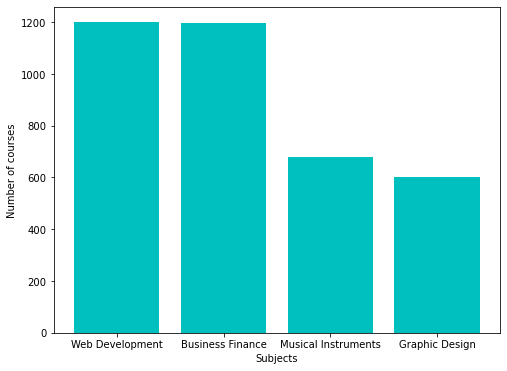

In [13]:
courses = data["subject"].value_counts()
plt.figure(figsize=(8,6))
plt.bar(courses.index,courses.values, color='c')
plt.xlabel('Subjects')
plt.ylabel('Number of courses')
plt.show()

In [14]:
data['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

'Web development' has the most number of courses whereas the 'Graphic Design' has the least number of courses

<b>Number of subscribers per subjects</b>

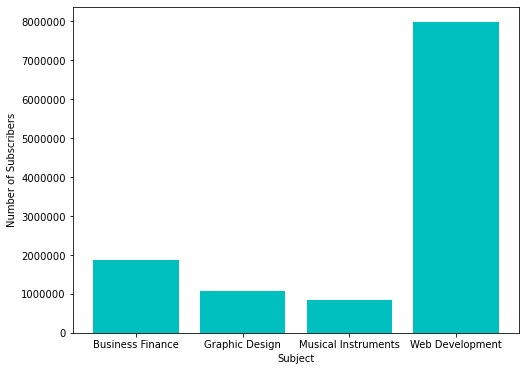

In [15]:
subs = data.groupby('subject').sum()['num_subscribers']
plt.figure(figsize=(8,6))
plt.bar(subs.index,subs.values, color='c')
plt.xlabel('Subject')
plt.ylabel('Number of Subscribers')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

In [16]:
data.groupby('subject').sum()['num_subscribers']

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64

-> 'Web development' subject has the most number of subscribers.<br>
-> 'Musical Instruments' has the least number of subscribers<br>
-> Despite having almost same number of courses in 'Web developments' and 'Business Finance', 'Business Finance' has less number    of subscribers 
comparatively

<b>Average number of subscribers per courses in each subject</b>

In [17]:
subs_per_sub = data.groupby('subject').sum()['num_subscribers']
courses_per_sub = data['subject'].value_counts()
subs_per_sub.sort_index(inplace=True)
courses_per_sub.sort_index(inplace=True)

In [18]:
avg = subs_per_sub/courses_per_sub
avg

subject
Business Finance       1563.774895
Graphic Design         1763.097844
Musical Instruments    1245.130882
Web Development        6650.476667
dtype: float64

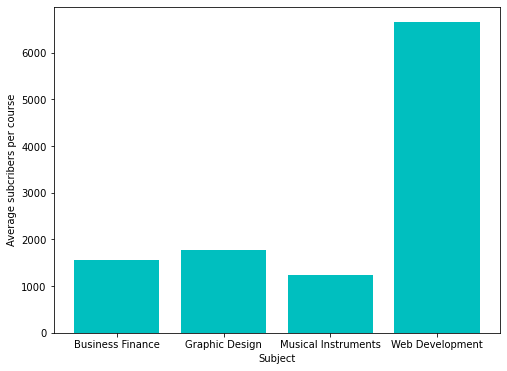

In [19]:
subs = data.groupby('subject').sum()['num_subscribers']
plt.figure(figsize=(8,6))
plt.bar(avg.index,avg.values, color='c')
plt.xlabel('Subject')
plt.ylabel('Average subcribers per course')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

Clearly the courses related to 'Web Development' have more subscribers per subject.

<b> Does price of course affect number of subscribers?</b>

In [20]:
is_paid = data['is_paid'].value_counts()
is_paid

True     3368
False     310
Name: is_paid, dtype: int64

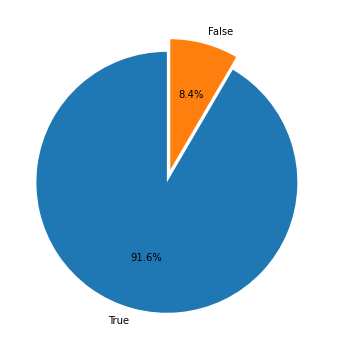

In [21]:
plt.figure(figsize=(8,6))
plt.pie(is_paid.values,labels=is_paid.index,explode = (0.1, 0),autopct='%1.1f%%',startangle=90)
plt.show()

Most of courses avaiable are paid courses

In [22]:
price = data.groupby('price').sum()['num_subscribers']
price

price
0      3575525
20     1320658
25      170861
30      286714
35      116300
40      200217
45       99011
50      717383
55       47561
60      157151
65       61281
70       46791
75      410166
80      100207
85       28806
90       41585
95      347949
100     410491
105      21613
110      37344
115      34497
120     167452
125      48257
130        964
135      16909
140      45169
145     124118
150     376202
155      12356
160       8904
165      13377
170      20350
175     167675
180      90366
185      16886
190     142439
195     939254
200    1336331
Name: num_subscribers, dtype: int64

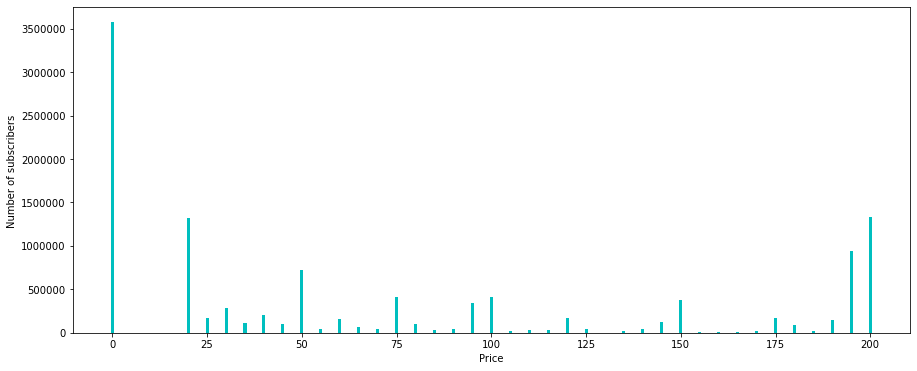

In [23]:
plt.figure(figsize=(15,6))
plt.bar(price.index,price.values, color='c')
plt.xlabel('Price')
plt.ylabel('Number of subscribers ')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

In [24]:
data['price'].corr(data['num_subscribers'])

0.05076934882586656

The graph doesn't show any upward or downward trend inbetween the paid courses<br>
The correlation between price and number of subscribers is very less.<br>
This may imply that price doesn't matter for most users as far as they are getting the appropriate content

<b>Most popular courses</b>

In [25]:
most_popular = data.sort_values(['num_subscribers'],ascending=False)[['course_title','num_subscribers']].head(10)
most_popular

,course_title,num_subscribers
2827,Learn HTML5 Programming From Scratch,268923
3032,Coding for Entrepreneurs Basic,161029
3230,The Web Developer Bootcamp,121584
2783,Build Your First Website in 1 Week with HTML5 ...,120291
3232,The Complete Web Developer Course 2.0,114512
1896,Free Beginner Electric Guitar Lessons,101154
2589,Web Design for Web Developers: Build Beautiful...,98867
2619,Learn Javascript & JQuery From Scratch,84897
3289,Practical PHP: Master the Basics and Code Dyna...,83737
3247,JavaScript: Understanding the Weird Parts,79612


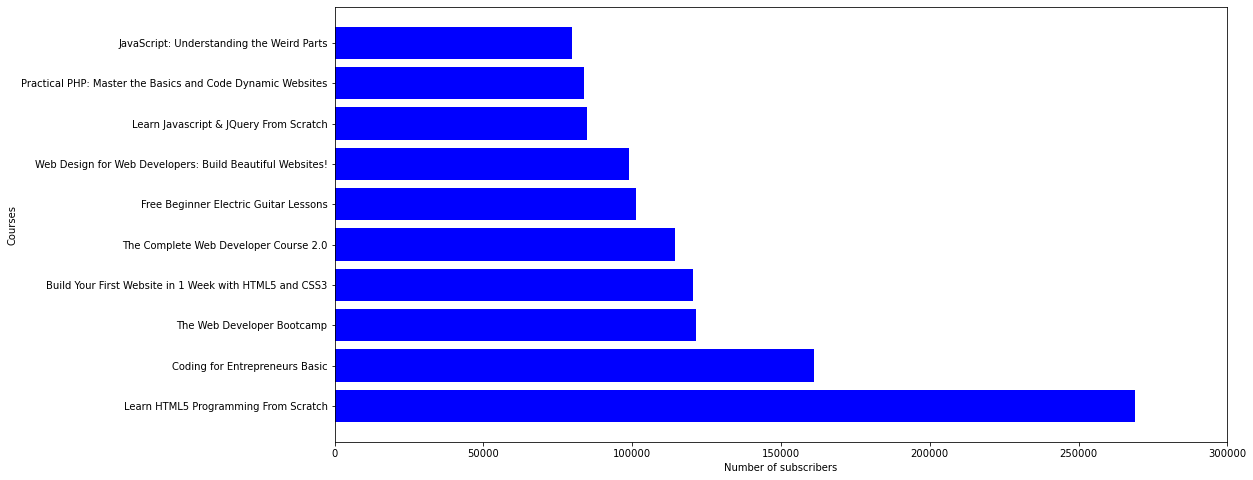

In [26]:
plt.figure(figsize=(16,8))
plt.barh(most_popular['course_title'],most_popular['num_subscribers'], color='b')
plt.xlabel('Number of subscribers')
plt.xlim(0, 300000)
plt.ylabel('Courses')
plt.show()

The most popular courses are displayed in the above graph<br>
The most popular courses are determined on the basis of number of subscribers<br>
The courses based on 'Web development' dominate this list

<b>Most Engaging courses</b>

In [27]:
most_engaging = data.sort_values(['num_reviews'],ascending=False)[['course_title','num_reviews']].head(10)
most_engaging

,course_title,num_reviews
3230,The Web Developer Bootcamp,27445
3232,The Complete Web Developer Course 2.0,22412
3204,Angular 4 (formerly Angular 2) - The Complete ...,19649
3247,JavaScript: Understanding the Weird Parts,16976
3254,Modern React with Redux,15117
3246,Learn and Understand AngularJS,11580
3251,Learn and Understand NodeJS,11123
2827,Learn HTML5 Programming From Scratch,8629
3228,Angular 2 with TypeScript for Beginners: The P...,8341
1979,Pianoforall - Incredible New Way To Learn Pian...,7676


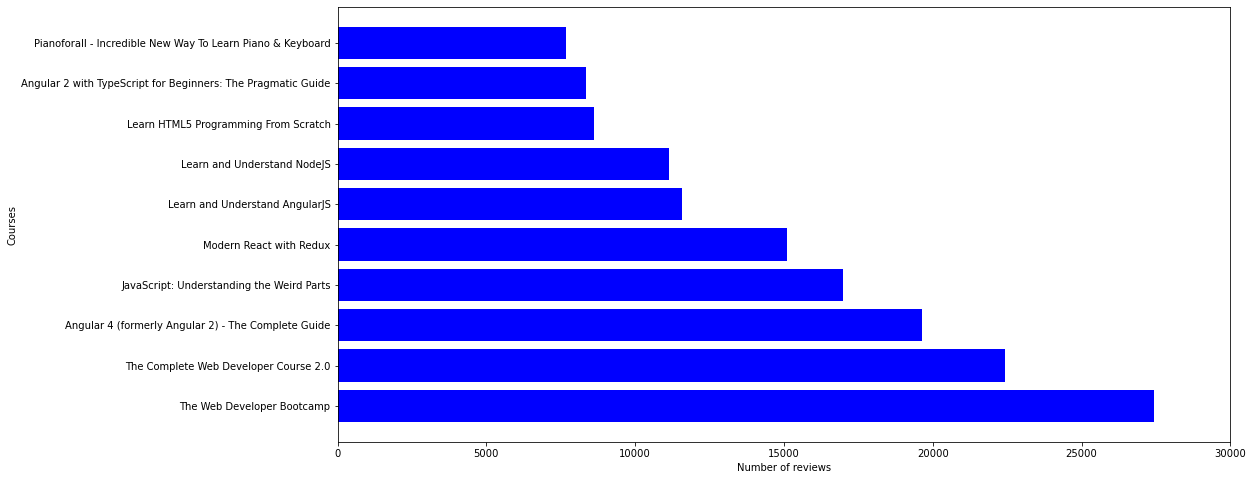

In [28]:
plt.figure(figsize=(16,8))
plt.barh(most_engaging['course_title'],most_engaging['num_reviews'], color='b')
plt.xlabel('Number of reviews')
plt.xlim(0, 30000)
plt.ylabel('Courses')
plt.show()

The most engaging courses are displayed in the above graph<br>
The most engaging courses are determined on the basis of number of reviews<br>
The courses based on 'Web development' dominate this list

<b> Does Level of course affect the number of subscribers?</b>

In [29]:
course_levels = data['level'].value_counts()
course_levels

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

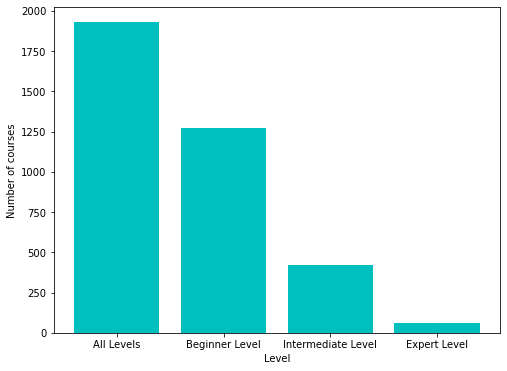

In [30]:
plt.figure(figsize=(8,6))
plt.bar(course_levels.index,course_levels.values, color='c')
plt.xlabel('Level')
plt.ylabel('Number of courses')
plt.show()

More number of courses are available for 'Beginner' level users<br>
The number of courses available decreases as the difficulty level increases

In [31]:
subs_levels = data.groupby('level').sum()['num_subscribers']
subs_levels

level
All Levels            6915076
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

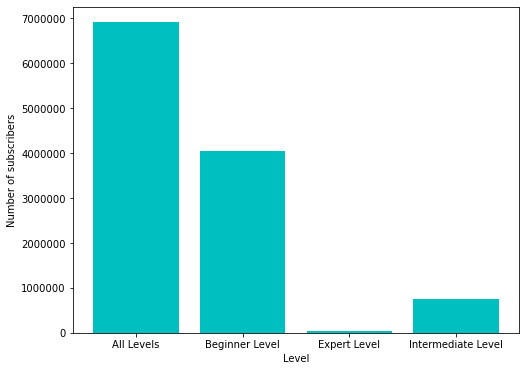

In [32]:
plt.figure(figsize=(8,6))
plt.bar(subs_levels.index,subs_levels.values, color='c')
plt.xlabel('Level')
plt.ylabel('Number of subscribers')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

Most number of users prefers courses of 'All levels' and 'Beginner Levels'<br>
The number of subsribers decreases as the difficulty level increases

<b>Are expert level courses generally longer than beginner level courses?</b>

In [33]:
all_level = data.loc[data['level'] == 'All Levels']['content_duration']
beg_level = data.loc[data['level'] == 'Beginner Level']['content_duration']
int_level = data.loc[data['level'] == 'Intermediate Level']['content_duration']
exp_level = data.loc[data['level'] == 'Expert Level']['content_duration']

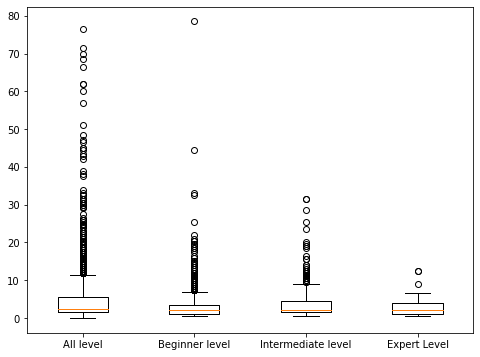

In [34]:
plt.figure(figsize=(8,6))
plt.boxplot([all_level,beg_level,int_level,exp_level])
plt.xticks([1, 2, 3, 4], ['All level','Beginner level','Intermediate level','Expert Level'])
plt.show()

From the above box plot, the median of all levels are almost same.<br>
Higher level courses are mostly shorter than other level courses.<br>
The reason maybe: As, level increases the time required to complete courses decreases as the users are expected to explore and learn more outside the course hours.

<b>Does subject of course affect price of course?</b>

In [35]:
data['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [36]:
sub1 = data.loc[data['subject'] == 'Web Development']['price']
sub2 = data.loc[data['subject'] == 'Business Finance']['price']
sub3 = data.loc[data['subject'] == 'Musical Instruments']['price']
sub4 = data.loc[data['subject'] == 'Graphic Design']['price']

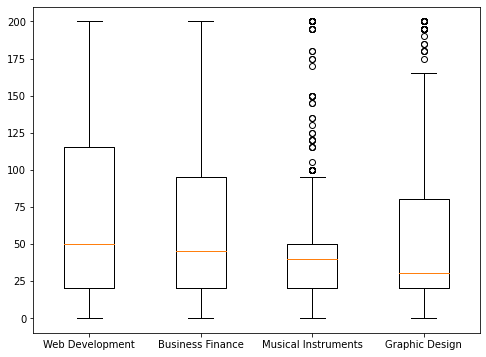

In [37]:
plt.figure(figsize=(8,6))
plt.boxplot([sub1,sub2,sub3,sub4])
plt.xticks([1, 2, 3, 4], ['Web Development','Business Finance','Musical Instruments','Graphic Design'])
plt.show()

From the plot it is clear that most of courses that are based on 'Web Development' and 'Business Finance' are costlier than other two mostly.<br>

<b>Most profitable courses for the company</b>

In [40]:
profit = data[['course_title','price','num_subscribers','subject']]

In [41]:
profit_amount = profit.loc[:,'price'] * profit.loc[:,'num_subscribers']
profit.loc[:,'profit_amount'] = pd.Series(profit_amount,index=profit.index)

In [42]:
sub1 = profit.loc[profit['subject'] == 'Web Development']
sub2 = profit.loc[profit['subject'] == 'Business Finance']
sub3 = profit.loc[profit['subject'] == 'Musical Instruments']
sub4 = profit.loc[profit['subject'] == 'Graphic Design']

In [43]:
ssub1 = sub1.sort_values(by=['profit_amount'],ascending = False)
ssub2= sub2.sort_values(by=['profit_amount'],ascending = False)
ssub3 = sub3.sort_values(by=['profit_amount'],ascending = False)
ssub4 = sub4.sort_values(by=['profit_amount'],ascending = False)
sprofit = profit.sort_values(by=['profit_amount'],ascending = False)

<b>Most profitable courses - Overall </b>

In [44]:
sprofit = sprofit.head(5)
sprofit

,course_title,price,num_subscribers,subject,profit_amount
3230,The Web Developer Bootcamp,200,121584,Web Development,24316800
3232,The Complete Web Developer Course 2.0,200,114512,Web Development,22902400
1979,Pianoforall - Incredible New Way To Learn Pian...,200,75499,Musical Instruments,15099800
3204,Angular 4 (formerly Angular 2) - The Complete ...,190,73783,Web Development,14018770
3247,JavaScript: Understanding the Weird Parts,175,79612,Web Development,13932100


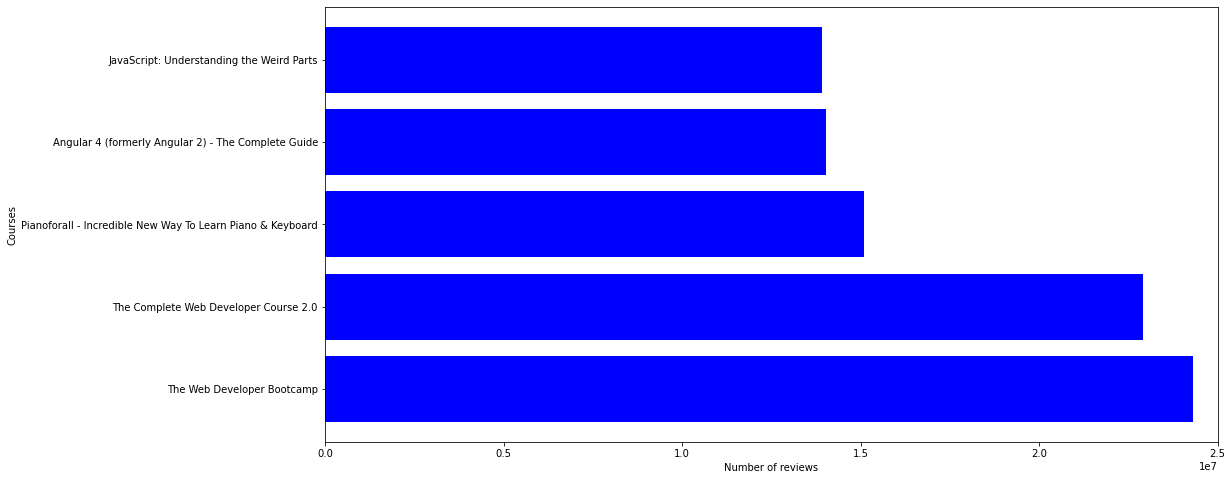

In [45]:
plt.figure(figsize=(16,8))
plt.barh(sprofit['course_title'],sprofit['profit_amount'], color='b')
plt.xlabel('Number of reviews')
plt.xlim(0, 25000000)
plt.ylabel('Courses')
plt.show()

The above graph shows the most profitable courses - overall.<br>
The courses on 'Web Development' seems to be more profitable<br>
The most profitable courses are determined based on the money earned from those courses

<b>Most profitable courses - Web Development </b>

In [46]:
ssub1 = ssub1.head()
ssub1

,course_title,price,num_subscribers,subject,profit_amount
3230,The Web Developer Bootcamp,200,121584,Web Development,24316800
3232,The Complete Web Developer Course 2.0,200,114512,Web Development,22902400
3204,Angular 4 (formerly Angular 2) - The Complete ...,190,73783,Web Development,14018770
3247,JavaScript: Understanding the Weird Parts,175,79612,Web Development,13932100
3251,Learn and Understand NodeJS,195,58208,Web Development,11350560


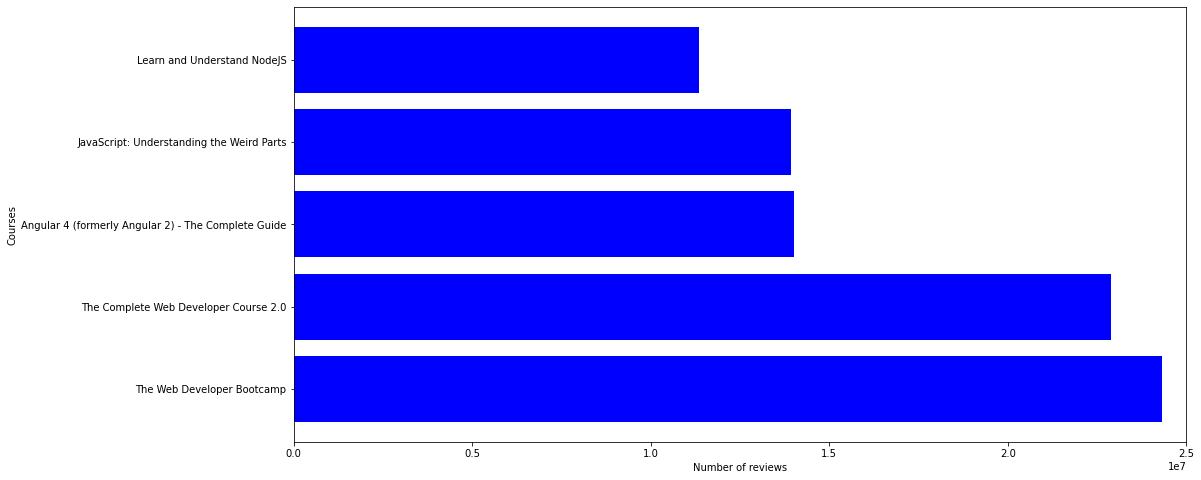

In [47]:
plt.figure(figsize=(16,8))
plt.barh(ssub1['course_title'],ssub1['profit_amount'], color='b')
plt.xlabel('Number of reviews')
plt.xlim(0, 25000000)
plt.ylabel('Courses')
plt.show()

The above graph shows the most profitable courses in Web development.

<b>Most profitable courses - Business Finance</b>

In [48]:
ssub2 = ssub2.head()
ssub2

,course_title,price,num_subscribers,subject,profit_amount
40,The Complete Financial Analyst Course 2017,195,24481,Business Finance,4773795
38,Beginner to Pro in Excel: Financial Modeling a...,195,22257,Business Finance,4340115
44,Black Algo Trading: Build Your Trading Robot,200,20195,Business Finance,4039000
36,Forex Trading A-Z™ - With LIVE Examples of For...,195,16900,Business Finance,3295500
37,"Introduction to Finance, Accounting, Modeling ...",200,11441,Business Finance,2288200


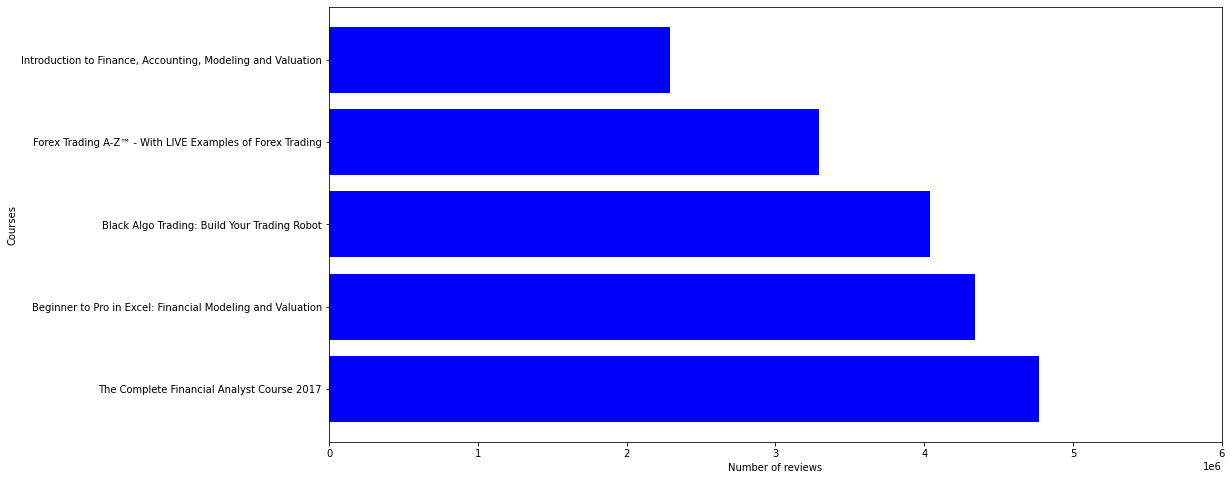

In [92]:
plt.figure(figsize=(16,8))
plt.barh(ssub2['course_title'],ssub2['profit_amount'], color='b')
plt.xlabel('Number of reviews')
plt.xlim(0, 6000000)
plt.ylabel('Courses')
plt.show()

The above graph shows the most profitable courses in Business Finance.

<b>Most profitable courses - Musical Instruments</b>

In [49]:
ssub3 = ssub3.head()
ssub3

,course_title,price,num_subscribers,subject,profit_amount
1979,Pianoforall - Incredible New Way To Learn Pian...,200,75499,Musical Instruments,15099800
1982,Complete Guitar System - Beginner to Advanced,145,32935,Musical Instruments,4775575
1980,The Professional Guitar Masterclass,200,21701,Musical Instruments,4340200
1986,"LEARN HARMONICA, amaze your friends and have f...",200,8857,Musical Instruments,1771400
1988,Ultimate Beginner Guitar Masterclass,200,8113,Musical Instruments,1622600


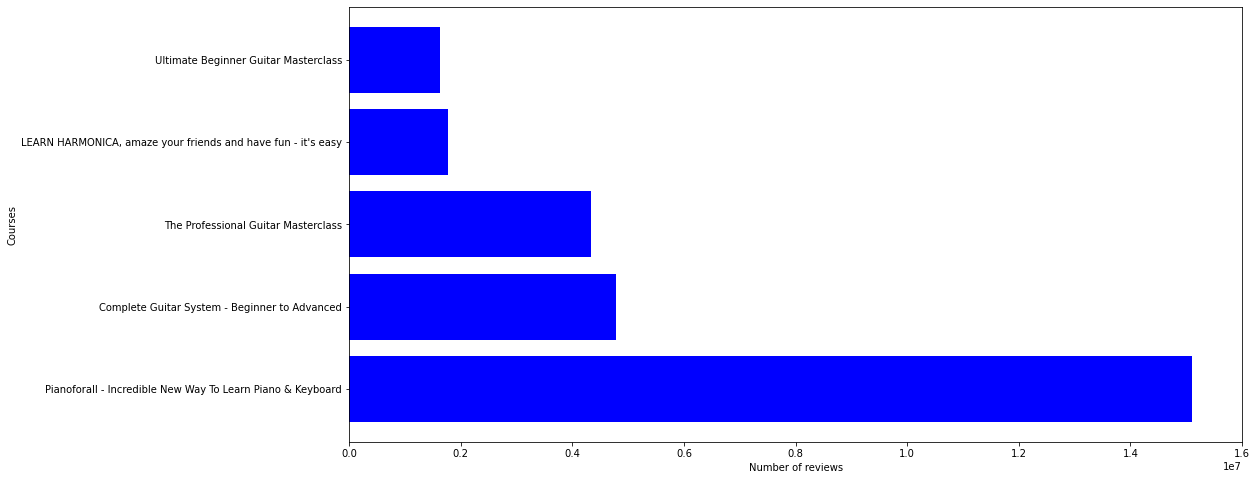

In [98]:
plt.figure(figsize=(16,8))
plt.barh(ssub3['course_title'],ssub3['profit_amount'], color='b')
plt.xlabel('Number of reviews')
plt.xlim(0, 16000000)
plt.ylabel('Courses')
plt.show()

The above graph shows the most profitable courses in 'Musical Instruments' subject.<br>
'Pianoforall - Incredible New Way To Learn Piano & Keyboard' seems to be the only course that earns more profit in this subject

<b>Most profitable courses - Graphic Design</b>

In [50]:
ssub4 = ssub4.head()
ssub4

,course_title,price,num_subscribers,subject,profit_amount
1213,Photoshop for Entrepreneurs - Design 11 Practi...,200,36288,Graphic Design,7257600
1526,How To Make Graphics For A Website,200,24857,Graphic Design,4971400
1211,The Ultimate Drawing Course - Beginner to Adva...,150,26742,Graphic Design,4011300
1220,Canva Graphics Design for Entrepreneurs - Desi...,200,18303,Graphic Design,3660600
1210,Graphic Design Bootcamp,200,15276,Graphic Design,3055200


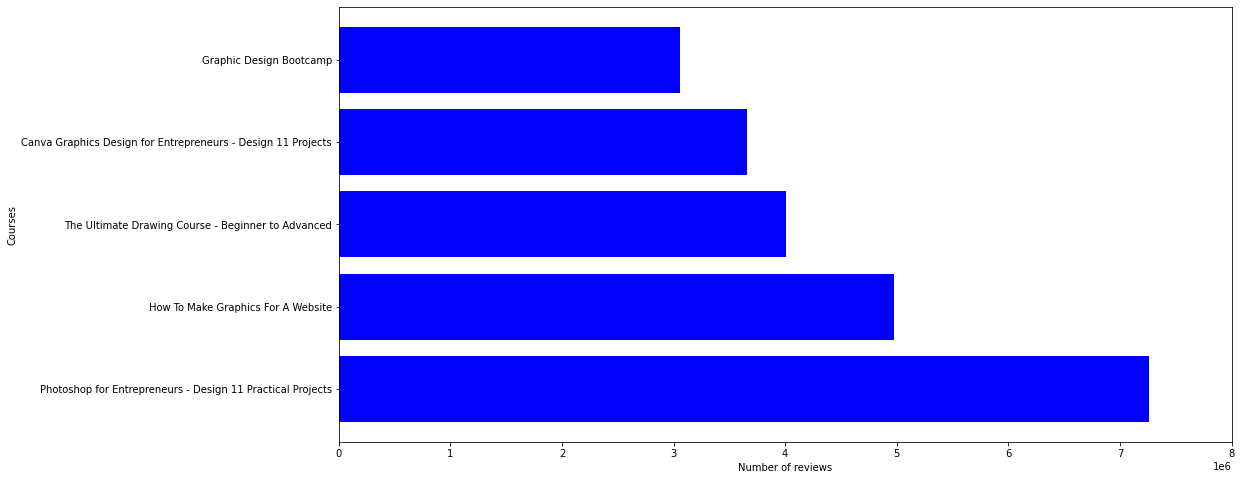

In [101]:
plt.figure(figsize=(16,8))
plt.barh(ssub4['course_title'],ssub4['profit_amount'], color='b')
plt.xlabel('Number of reviews')
plt.xlim(0, 8000000)
plt.ylabel('Courses')
plt.show()

The above graph shows the most profitable courses in 'Graphic Design' subject.

<b> Growth of Udemy - Number of courses per subject</b>

In [51]:
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])

In [52]:
growth_courses = data[['published_timestamp', 'subject']]
growth_courses = growth_courses.sort_values('published_timestamp')
temp = growth_courses['published_timestamp'].value_counts().reset_index()
temp.columns = ['Date', 'Counts']
temp['Cummulative'] = temp['Counts'].cumsum()
dummies = pd.get_dummies(growth_courses['subject'])
growth_courses = growth_courses.join(dummies)
growth_courses['cum_busfin'] = growth_courses['Business Finance'].cumsum()
growth_courses['cum_grades'] = growth_courses['Graphic Design'].cumsum()
growth_courses['cum_music'] = growth_courses['Musical Instruments'].cumsum()
growth_courses['cum_webdev'] = growth_courses['Web Development'].cumsum()

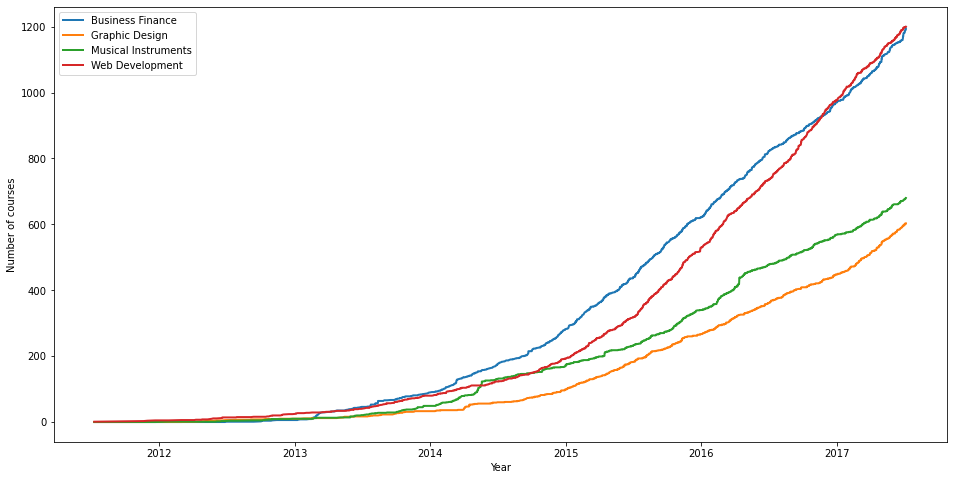

In [53]:
plt.figure(figsize=(16,8))
plt.plot(growth_courses['published_timestamp'],growth_courses['cum_busfin'],linewidth=2)
plt.plot(growth_courses['published_timestamp'],growth_courses['cum_grades'],linewidth=2)
plt.plot(growth_courses['published_timestamp'],growth_courses['cum_music'],linewidth=2)
plt.plot(growth_courses['published_timestamp'],growth_courses['cum_webdev'],linewidth=2)
plt.legend(['Business Finance','Graphic Design','Musical Instruments','Web Development']) 
plt.xlabel('Year')
plt.ylabel('Number of courses')
plt.show()

The company's growth started in 2013-2014. <br>
After that the number of courses available is increasing especially courses on 'Web Developement' and 'Business Finance'.

<b>Relationship between variables</b>

In [54]:
corr_data = data.drop(['course_id','course_title','url','published_timestamp'],axis=1)
corr_data

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,True,200,2147,23,51,All Levels,1.5,Business Finance
1,True,75,2792,923,274,All Levels,39.0,Business Finance
2,True,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,True,95,2451,11,36,All Levels,3.0,Business Finance
4,True,200,1276,45,26,Intermediate Level,2.0,Business Finance
...,...,...,...,...,...,...,...,...
3673,True,100,1040,14,21,All Levels,2.0,Web Development
3674,True,25,306,3,42,Beginner Level,3.5,Web Development
3675,True,40,513,169,48,All Levels,3.5,Web Development
3676,True,50,300,31,38,All Levels,3.0,Web Development


In [55]:
level = {'All Levels': 1,'Beginner Level': 2, 'Intermediate Level':3, 'Expert Level':4}
subject = {'Business Finance': 1,'Web Development': 2, 'Graphic Design':3, 'Musical Instruments':4}
corr_data.level = [level[item] for item in corr_data.level] 
corr_data.subject = [subject[item] for item in corr_data.subject]
corr_data

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,True,200,2147,23,51,1,1.5,1
1,True,75,2792,923,274,1,39.0,1
2,True,45,2174,74,51,3,2.5,1
3,True,95,2451,11,36,1,3.0,1
4,True,200,1276,45,26,3,2.0,1
...,...,...,...,...,...,...,...,...
3673,True,100,1040,14,21,1,2.0,2
3674,True,25,306,3,42,2,3.5,2
3675,True,40,513,169,48,1,3.5,2
3676,True,50,300,31,38,1,3.0,2


In [56]:
corr = corr_data.corr()
corr_index = corr.index
corr

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
is_paid,1.000000,0.328513,-0.266159,-0.087471,0.112574,-0.033156,0.094417,0.030328
price,0.328513,1.000000,0.050769,0.113696,0.330160,-0.073219,0.293450,-0.124391
num_subscribers,-0.266159,0.050769,1.000000,0.649946,0.157746,-0.062092,0.161839,-0.041205
num_reviews,-0.087471,0.113696,0.649946,1.000000,0.243029,-0.055649,0.228889,-0.025475
num_lectures,0.112574,0.330160,0.157746,0.243029,1.000000,-0.102291,0.801647,0.009324
level,-0.033156,-0.073219,-0.062092,-0.055649,-0.102291,1.000000,-0.107274,0.081421
content_duration,0.094417,0.293450,0.161839,0.228889,0.801647,-0.107274,1.000000,-0.055684
subject,0.030328,-0.124391,-0.041205,-0.025475,0.009324,0.081421,-0.055684,1.000000


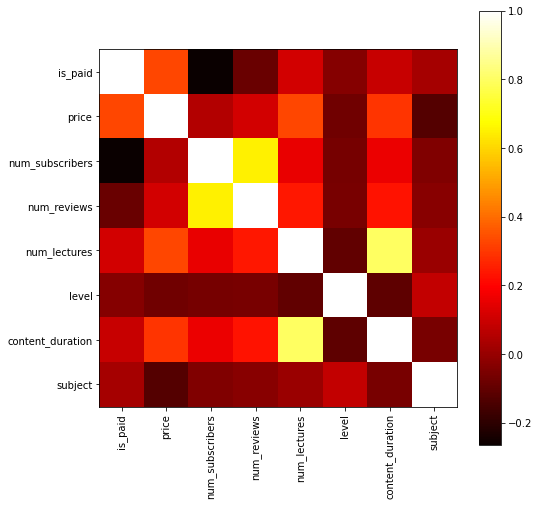

In [57]:
plt.figure(figsize=(8,8))
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], corr_index, rotation='vertical')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], corr_index)
plt.colorbar()
plt.show()

We can see some obvious correlations between number of subscribers and number of reviews, and also between content duration and number of lectures

### Regression Analysis 

Lets try predicting number of subscribers based on other parameters

In [58]:
reg_data = corr_data
reg_data

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,True,200,2147,23,51,1,1.5,1
1,True,75,2792,923,274,1,39.0,1
2,True,45,2174,74,51,3,2.5,1
3,True,95,2451,11,36,1,3.0,1
4,True,200,1276,45,26,3,2.0,1
...,...,...,...,...,...,...,...,...
3673,True,100,1040,14,21,1,2.0,2
3674,True,25,306,3,42,2,3.5,2
3675,True,40,513,169,48,1,3.5,2
3676,True,50,300,31,38,1,3.0,2


In [59]:
X = reg_data.drop(['num_subscribers'],axis=1)
X

,is_paid,price,num_reviews,num_lectures,level,content_duration,subject
0,True,200,23,51,1,1.5,1
1,True,75,923,274,1,39.0,1
2,True,45,74,51,3,2.5,1
3,True,95,11,36,1,3.0,1
4,True,200,45,26,3,2.0,1
...,...,...,...,...,...,...,...
3673,True,100,14,21,1,2.0,2
3674,True,25,3,42,2,3.5,2
3675,True,40,169,48,1,3.5,2
3676,True,50,31,38,1,3.0,2


In [60]:
Y = reg_data['num_subscribers']
Y

0       2147
1       2792
2       2174
3       2451
4       1276
        ... 
3673    1040
3674     306
3675     513
3676     300
3677     901
Name: num_subscribers, Length: 3678, dtype: int64

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=76)

In [62]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2942, 7) (736, 7) (2942,) (736,)


In [63]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
pred = linreg.predict(X_test)

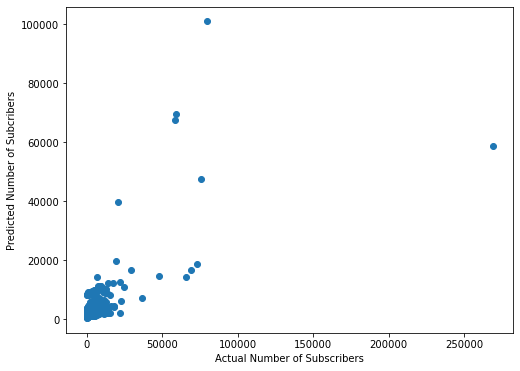

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test,pred)
plt.xlabel('Actual Number of Subscribers')
plt.ylabel('Predicted Number of Subcribers')
plt.show()

In [65]:
metrics.mean_absolute_error(Y_test, pred)

2667.4050954138434

In [66]:
np.sqrt(metrics.mean_squared_error(Y_test, pred)) 

9251.59336603172

In [67]:
print('Feature Importance Score:')
feature2= pd.Series(linreg.coef_, index=X.columns)
feature2

Feature Importance Score:


is_paid            -7465.874982
price                  9.168584
num_reviews            5.774120
num_lectures          -0.725543
level               -314.473424
content_duration      26.776346
subject              -84.631513
dtype: float64

<ul>
    <li> Further Data processing and Feature selection maybe needed as the model seems not to be an ideal fit for the data.</li>
    <li> Here the paid/free, course level and subject seems to have less importance in predicting number of subscribers.</li>
    <li> The 'Content Duration' seems to have more importance in predicting number of subscribers.</li>
</ul>

# Conclusions:

<ul>
    <li> Most of the courses are based on four subjects : 
        <ol>
            <li> Web Development</li>
            <li> Business Finance </li>
            <li> Graphical Design</li>
            <li> Musical Instruments </li>
         </ol>
     </li>
    <li> Courses on 'Web Development' has most number of subscribers and most number of subscribers per courses. Also courses on 'Web Development' are more in number.</li>
    <li> Courses on Musical Instruments have least number of subscribers per courses.</li>
    <li> Courses on 'Business Finance' and 'Web development' are almost same in numbers but the number of subscribers is very low in 'Business Finance' when compared to 'Web Development'.</li>
    <ul><li><b>Also, courses on 'Web development' are generally more profitable courses.</b></li>
        <li> <b>So, Udemy may consider further increasing the number of courses on 'Web Development'.</b></li>
    </ul>
    <li> Most of courses avaliable (about 91%) are paid courses.</li>
    <li> Courses on 'Web Development' and 'Business Finance' are costlier than other two generally.</li>
    <li> Courses on 'Web Development' dominate the most popular courses lists.</li>
    <li> Courses on 'Graphic Design' are less in numbers over years.</li>
    <li>Price doesn't seem to be a matter of concern for users as long as they are getting the required content.</li>
    <li> 'Expert Level' Courses are generally shorter in duration than others.</li>
    <li> <b>Most of the user seems to have the 'Content duration' as a criteria to choose a course.</b></li>
    <li> In 2013, the company's growth starts and in 2014, company sees a steep growth</li>
    <li> Between the years 2013-2017 'Web Developement' seems to be the most popular subject followed by 'Business Finance'</li><br>
    <li><b>Note:</b>Further Feature selection is required before applying the data to Machine Learning Techniques</li>
</ul>    